In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
Power = pd.read_csv("Pasion et al dataset.csv")
print(Power[['Date', 'Time']].dtypes)

Date    int64
Time    int64
dtype: object


In [3]:
Power['Date'] = Power['Date'].astype(str)
Power['Time'] = Power['Time'].astype(str)

In [4]:
Power['DateTime'] = pd.to_datetime(Power['Date'] + ' ' + Power['Time'], errors='coerce')
Power = Power.set_index('DateTime')

In [5]:
imp_Power = Power[["Altitude", "YRMODAHRMI", "Month", "Hour", "Humidity", "AmbientTemp", "PolyPwr", "Wind.Speed", "Visibility", "Pressure", "Cloud.Ceiling"]]
X = imp_Power[['Altitude', 'YRMODAHRMI', 'Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']]  # Features
y = imp_Power['PolyPwr']

In [6]:
split_index = int(len(imp_Power) * 0.8)
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

In [7]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28.183814193484906


In [12]:
combined = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1, ignore_index=True)
combined.columns = ["actual", "predictions"]

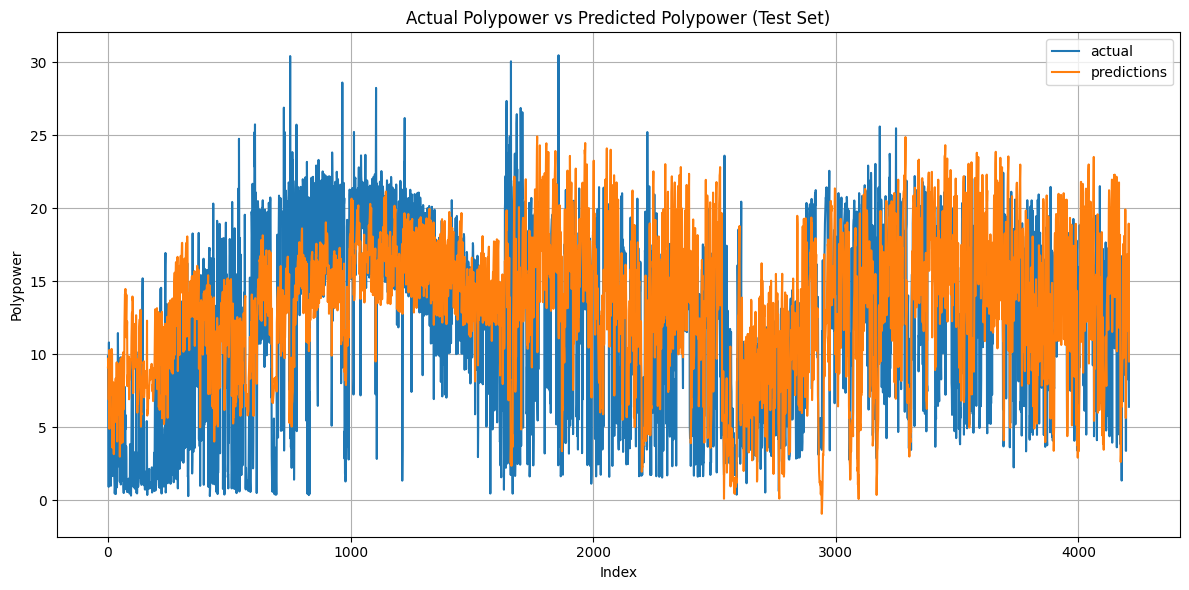

In [13]:
combined.plot(figsize=(12, 6))
plt.xlabel('Index')
plt.ylabel('Polypower')
plt.title('Actual Polypower vs Predicted Polypower (Test Set)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
